In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
import nltk
nltk.download('omw-1.4')
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\abhin\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [29]:
df = pd.read_csv(r"D:\abhin\CLG\Assignments\IT\4th sem\DS\Emotion_recognition\Code files\Text_dataset\data.csv")

In [30]:
df = df[df['Label'] != 2]

In [31]:
df['Label'] = df['Label'].map({0:0, 1:1, 3:2, 4:3, 5:4})

In [32]:
df.reset_index(drop=True, inplace=True)

In [33]:
df

,Text,Label
0,i feel awful about it too because it s my job ...,0
1,im alone i feel awful,0
2,ive probably mentioned this before but i reall...,1
3,i was feeling a little low few days back,0
4,i am one of those people who feels like going ...,1
...,...,...
382250,that was what i felt when i was finally accept...,1
382251,i take every day as it comes i m just focussin...,3
382252,i just suddenly feel that everything was fake,0
382253,im feeling more eager than ever to claw back w...,1


In [34]:
df['Label_name'] = df['Label'].map({0:'sadness', 1:'joy', 2:'anger', 3:'fear', 4:'surprise'})
counts = df['Label_name'].value_counts()
counts

joy         141067
sadness     121187
anger        57317
fear         47712
surprise     14972
Name: Label_name, dtype: int64

Text(0.5, 1.0, 'Classes and their counts')

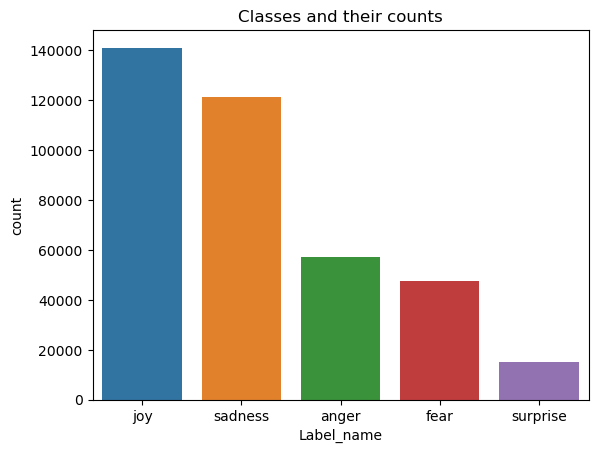

In [35]:
order = ['joy', 'sadness', 'anger', 'fear', 'surprise']
sns.countplot(df, x='Label_name',order=order)
plt.title('Classes and their counts')

In [36]:
df['word_count'] = df['Text'].apply(lambda x : len(str(x).split()))

Text(0.5, 1.0, 'Word Count vs Classes')

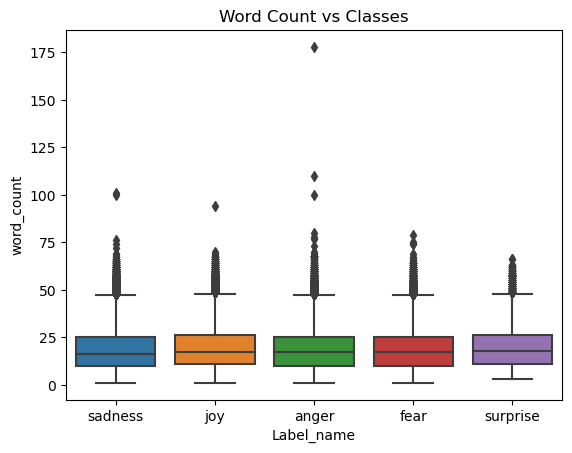

In [37]:
sns.boxplot(x="Label_name", y="word_count", data=df)
plt.title('Word Count vs Classes')

<Axes: >

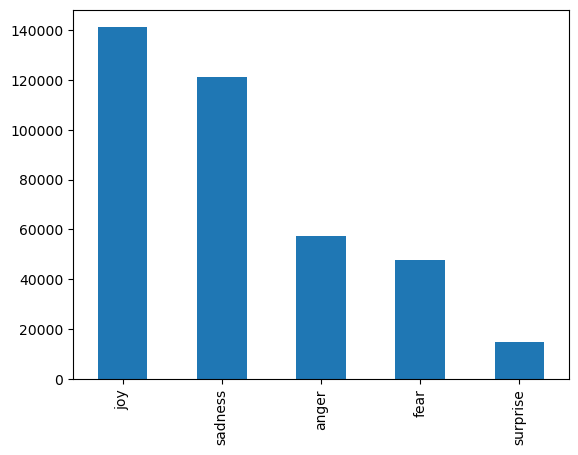

In [38]:
counts.plot(kind='bar')

In [39]:
train_split = int(len(df) * 0.8)
val_split = int(len(df) * 0.9)

In [40]:
emotion_train = df[:train_split]
# emotion_valid = df[train_split:val_split]
emotion_test = df[train_split:]

In [41]:
emotion_train['text_length'] = emotion_train['Text'].astype(str).apply(len)
emotion_train

C:\Users\abhin\AppData\Local\Temp\ipykernel_8504\4000732481.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  emotion_train['text_length'] = emotion_train['Text'].astype(str).apply(len)


,Text,Label,Label_name,word_count,text_length
0,i feel awful about it too because it s my job ...,0,sadness,26,112
1,im alone i feel awful,0,sadness,5,21
2,ive probably mentioned this before but i reall...,1,joy,27,152
3,i was feeling a little low few days back,0,sadness,9,40
4,i am one of those people who feels like going ...,1,joy,26,115
...,...,...,...,...,...
305799,i allow her to share special moments with a gr...,2,anger,17,102
305800,i feel called to this work and because i am pa...,1,joy,27,145
305801,i feel anger when you describe to me in detail...,0,sadness,25,108
305802,i guess but i feel so stupid for being lured i...,0,sadness,43,201


C:\Users\abhin\AppData\Local\Temp\ipykernel_8504\1254477894.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(emotion_train['text_length'], bins=50)


Text(0.5, 0, 'Text Length')

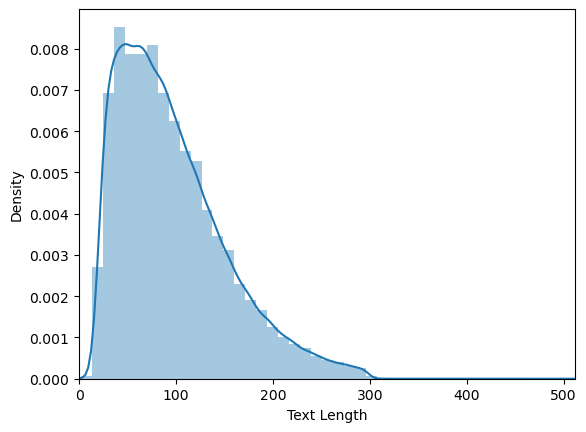

In [42]:
sns.distplot(emotion_train['text_length'], bins=50)
plt.xlim([0, 512]);
plt.xlabel('Text Length')

In [43]:
x_train = emotion_train['Text']
# x_valid = emotion_valid['Text']
x_test = emotion_test['Text']

In [44]:
cv = CountVectorizer(max_features = 10000)
X_train = cv.fit_transform(x_train)
y_train = emotion_train['Label']

In [45]:
# X_valid = cv.transform(x_valid)
# y_valid = emotion_valid['Label']

In [46]:
X_test = cv.transform(x_test)
y_test = emotion_test['Label']

In [47]:
X_train.shape

(305804, 10000)

In [48]:
mnb = MultinomialNB()
mnb.fit(X_train, y_train)

MultinomialNB()

In [49]:
y_pred = mnb.predict(X_test)

In [50]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, y_pred))
print()
print(classification_report(y_test, y_pred))

[[22563   657   501   420    84]
 [  753 26865   231   276   152]
 [  645   321 10084   342    29]
 [  532   243   363  7987   414]
 [   79   345    35   471  2059]]

              precision    recall  f1-score   support

           0       0.92      0.93      0.92     24225
           1       0.94      0.95      0.95     28277
           2       0.90      0.88      0.89     11421
           3       0.84      0.84      0.84      9539
           4       0.75      0.69      0.72      2989

    accuracy                           0.91     76451
   macro avg       0.87      0.86      0.86     76451
weighted avg       0.91      0.91      0.91     76451



In [51]:
y_train_pred = mnb.predict(X_train)

print(confusion_matrix(y_train, y_train_pred))
print()
print(classification_report(y_train, y_train_pred))

[[ 91274   2083   1859   1471    275]
 [  2834 107445    896   1025    590]
 [  2327   1093  41220   1168     88]
 [  1816    764   1214  32892   1487]
 [   242    929     84   1510   9218]]

              precision    recall  f1-score   support

           0       0.93      0.94      0.93     96962
           1       0.96      0.95      0.95    112790
           2       0.91      0.90      0.90     45896
           3       0.86      0.86      0.86     38173
           4       0.79      0.77      0.78     11983

    accuracy                           0.92    305804
   macro avg       0.89      0.88      0.89    305804
weighted avg       0.92      0.92      0.92    305804

